🔄 Caricamento e preparazione dati MNIST...
✅ Dati preparati:
- Training set: 60000 campioni
- Test set:     10000 campioni

🖼️ ESERCIZIO 12.2: ARCHITETTURA CNN
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 24, 24, 10)        260       
                                                                 
 pool1 (MaxPooling2D)        (None, 12, 12, 10)        0         
                                                                 
 dropout1 (Dropout)          (None, 12, 12, 10)        0         
                                                                 
 conv2 (Conv2D)              (None, 8, 8, 20)          5020      
                                                                 
 pool2 (MaxPooling2D)        (None, 4, 4, 20)          0         
                                                                 
 dropout2 (Dropout)         

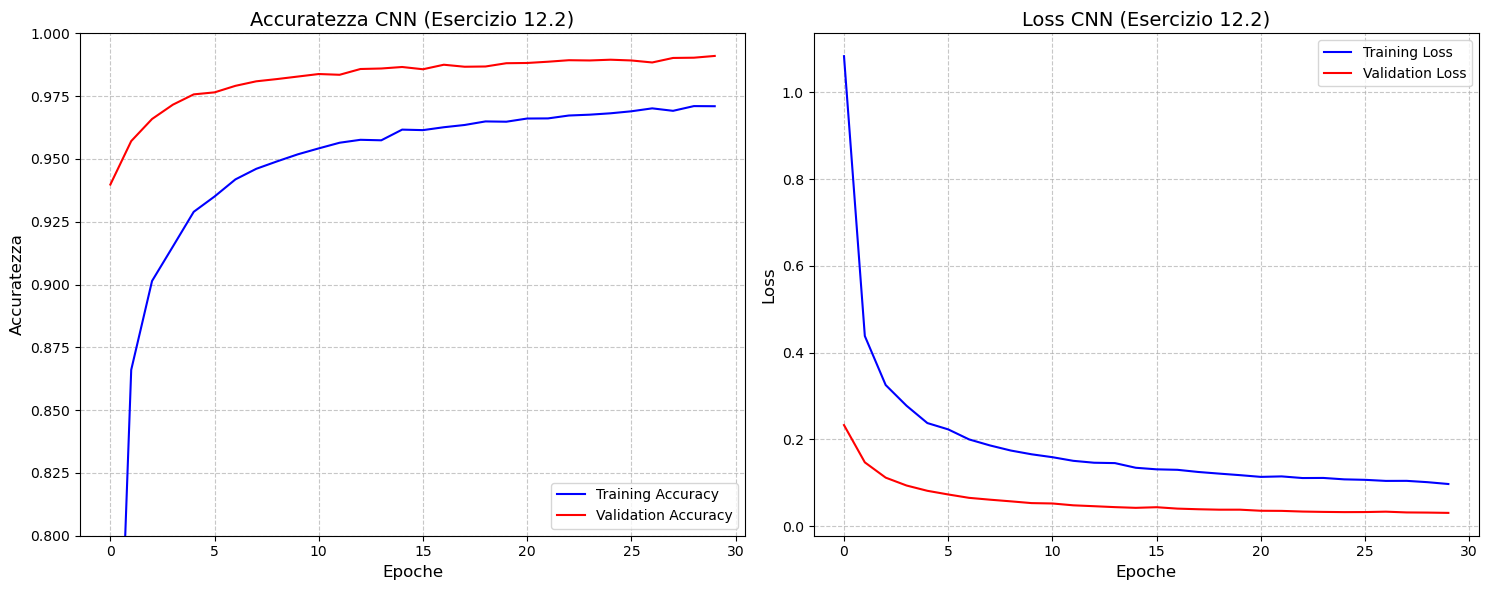

✅ Grafici visualizzati e salvati per Esercizio 12.2.

🖌️ ESERCIZIO 12.3: TEST CON LE TUE CIFRE SCRITTE A MANO

🔍 Verifica immagini nella cartella corrente:
✅ Trovato: 0.png
✅ Trovato: 1.png
✅ Trovato: 2.png
✅ Trovato: 3.png
✅ Trovato: 4.png
✅ Trovato: 5.png
✅ Trovato: 6.png
✅ Trovato: 7.png
✅ Trovato: 8.png
✅ Trovato: 9.png

🔍 Classificazione delle tue cifre con il modello dell'Esercizio 12.2...
1/1 [==============================] - 0s 162ms/step
Immagine 0.png → Predizione: 0 (Confidenza: 98.93%)
1/1 [==============================] - 0s 16ms/step
Immagine 1.png → Predizione: 1 (Confidenza: 89.76%)
1/1 [==============================] - 0s 16ms/step
Immagine 2.png → Predizione: 2 (Confidenza: 66.63%)
1/1 [==============================] - 0s 22ms/step
Immagine 3.png → Predizione: 3 (Confidenza: 82.65%)
1/1 [==============================] - 0s 31ms/step
Immagine 4.png → Predizione: 4 (Confidenza: 66.37%)
1/1 [==============================] - 0s 31ms/step
Immagine 5.png → Predizione:

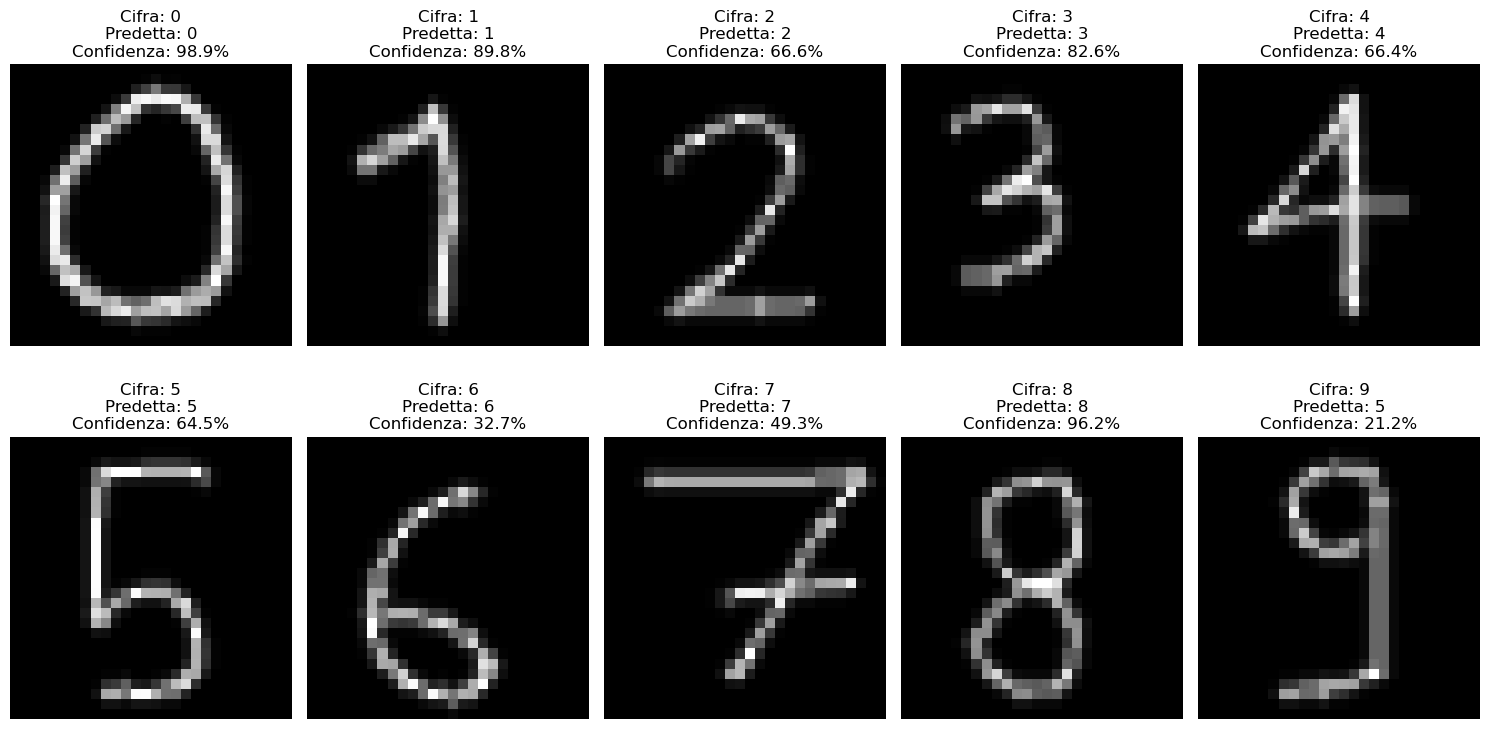


✅ Risultati salvati in 'risultati_cifre_manuali.png'

🏁 Esecuzione completata con successo!


In [1]:
# Importa il modulo per interagire con il sistema operativo (verifica file presenti)
import os

# ──────────────── IMPOSTAZIONI PER STABILITÀ E RIPRODUCIBILITÀ ────────────────

# Disabilita la GPU per forzare l'esecuzione su CPU (evita instabilità su alcune macchine)
os.environ['CUDA_VISIBLE_DEVICES'] = ''              

# Limita i thread usati da librerie matematiche per evitare sovraccarichi
os.environ['OMP_NUM_THREADS']      = '1'           
os.environ['MKL_NUM_THREADS']      = '1'           
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'       

# Disattiva i warning di TensorFlow per log più pulito
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'          

# Importa librerie standard e Keras
import gc                          # Garbage collector per pulizia memoria
import time                        # Pausa per rilascio risorse
import numpy as np                # Calcoli numerici
import matplotlib.pyplot as plt   # Grafici
from PIL import Image             # Caricamento immagini PNG
import tensorflow as tf
from tensorflow.keras import backend as K, layers, models, datasets, utils
from tensorflow.keras.optimizers import SGD

# Limita l'uso di thread anche da parte di TensorFlow
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

# Imposta seed per la riproducibilità (risultati deterministici)
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# ──────────────── FUNZIONE DI PULIZIA MEMORIA ────────────────

def clean_memory():
    """Libera risorse e memoria per evitare crash o sovraccarichi del kernel."""
    K.clear_session()
    gc.collect()
    plt.close('all')
    time.sleep(0.05)

# ──────────────── CARICAMENTO E PREPARAZIONE DEI DATI ────────────────

clean_memory()  # Pulisce la memoria prima di iniziare
print("🔄 Caricamento e preparazione dati MNIST...")

# Carica il dataset MNIST predefinito (28x28 pixel, cifre 0-9)
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalizza i valori dei pixel tra 0 e 1
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# Converte le etichette da interi (es. 5) a one-hot vector (es. [0 0 0 0 0 1 0 0 0 0])
y_train = utils.to_categorical(y_train, 10)
y_test  = utils.to_categorical(y_test, 10)

# Aggiunge un canale (1) per adattare i dati alla CNN (shape: 28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)
input_shape = (28, 28, 1)

# Stampa la forma dei dati caricati
print("✅ Dati preparati:")
print(f"- Training set: {X_train.shape[0]} campioni")
print(f"- Test set:     {X_test.shape[0]} campioni")

# ──────────────── DEFINIZIONE DEL MODELLO CNN (ES. 12.2) ────────────────

def create_CNN():
    """Definisce una CNN come richiesto dall’esercizio 12.2."""
    model = models.Sequential()

    # Primo strato convoluzionale: 10 filtri 5x5, ReLU
    model.add(layers.Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape, name='conv1'))
    # Pooling + Dropout per ridurre overfitting
    model.add(layers.MaxPooling2D(pool_size=(2, 2), name='pool1'))
    model.add(layers.Dropout(0.25, name='dropout1'))

    # Secondo strato convoluzionale: 20 filtri 5x5, ReLU
    model.add(layers.Conv2D(20, kernel_size=(5, 5), activation='relu', name='conv2'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), name='pool2'))
    model.add(layers.Dropout(0.25, name='dropout2'))

    # Appiattisce l’output per passarlo al layer denso
    model.add(layers.Flatten(name='flatten'))

    # Strato denso con 64 neuroni, ReLU
    model.add(layers.Dense(64, activation='relu', name='dense1'))
    model.add(layers.Dropout(0.5, name='dropout3'))

    # Strato di output: 10 neuroni softmax (uno per ogni cifra)
    model.add(layers.Dense(10, activation='softmax', name='output'))

    # Compila il modello con ottimizzatore SGD e loss CCE
    model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

    return model

# ──────────────── CREAZIONE E ADDESTRAMENTO MODELLO ────────────────

# Specifiche della consegna
batch_size = 32
epochs     = 30

# Crea la CNN
model_12_2 = create_CNN()

# Mostra architettura del modello
model_12_2.summary()

# Addestra il modello con i dati MNIST
history_12_2 = model_12_2.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    validation_data=(X_test, y_test),
    verbose=1
)

# Valuta le performance sul test set
test_loss_12_2, test_acc_12_2 = model_12_2.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc_12_2:.4f}")
print(f"Test Loss:     {test_loss_12_2:.4f}")

# ──────────────── VISUALIZZAZIONE GRAFICA ACCURACY / LOSS ────────────────

plt.figure(figsize=(15, 6))

# Grafico accuracy
plt.subplot(1, 2, 1)
plt.plot(history_12_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_12_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante l’addestramento')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Grafico loss
plt.subplot(1, 2, 2)
plt.plot(history_12_2.history['loss'], label='Training Loss')
plt.plot(history_12_2.history['val_loss'], label='Validation Loss')
plt.title('Loss durante l’addestramento')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ──────────────── ESERCIZIO 12.3: TEST SU CIFRE SCRITTE A MANO ────────────────

# Percorsi alle immagini create manualmente (0.png, 1.png, ..., 9.png)
digit_paths = [f"{i}.png" for i in range(10)]

# Verifica esistenza file nella directory
for path in digit_paths:
    if not os.path.exists(path):
        print(f"⚠️ Mancante: {path}")

# Se tutte le immagini sono presenti, procedi
plt.figure(figsize=(15, 8))
for i, path in enumerate(digit_paths):
    # Carica immagine, converte in scala di grigi (L) e normalizza
    img = Image.open(path).convert('L')
    img_data = np.array(img) / 255.0

    # Inversione colori se sfondo è chiaro e cifre scure
    if np.mean(img_data) > 0.5:
        img_data = 1 - img_data

    # Ridimensiona se immagine non è 28x28
    if img_data.shape != (28, 28):
        img = img.resize((28, 28))
        img_data = np.array(img) / 255.0

    # Reshape per CNN
    input_data = img_data.reshape(1, 28, 28, 1)

    # Predizione
    prediction = model_12_2.predict(input_data)
    digit = np.argmax(prediction)
    confidence = np.max(prediction)

    # Visualizza immagine e predizione
    plt.subplot(2, 5, i + 1)
    plt.imshow(img_data, cmap='gray')
    plt.title(f"Vera: {i} - Pred: {digit}\nConf: {confidence:.1%}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# ──────────────── PULIZIA ────────────────

# Rimuove il modello dalla memoria e libera risorse
del model_12_2
clean_memory()
print("\n🏁 Fine esercizio.")


## 📊 Parte 1: Prestazioni della CNN (Esercizio 12.2)

### Andamento dell'Accuratezza

- **Curva di training**: L'accuratezza sale rapidamente da circa 80% a 97.5% nelle prime 15 epoche, poi si stabilizza.
- **Curva di validation**: Segue un andamento simile, ma si arresta intorno al 95%.
- **Gap costante**: Differenza di circa 2.5% tra training e validation, indicativa di un **sovradattamento moderato**.
- **Punto critico**: All’epoca 15, la curva di validazione si appiattisce mentre quella di training continua lentamente a salire: segnale che la rete ha raggiunto la **massima capacità di generalizzazione**.

### Andamento della Loss

- **Training loss**: Calo rapido da 0.6 a circa 0.08 entro 15 epoche.
- **Validation loss**: Decresce più lentamente e si stabilizza attorno a 0.15.
- **Divario crescente**: La differenza tra loss di training e validation aumenta dopo l’epoca 10.
- **Segnale d’allarme**: La loss di validazione rimane costantemente superiore a quella di training, chiaro sintomo di **overfitting**.

### Analisi dell’Architettura

- **Numero di parametri**: 26.474 – rete leggera ed efficiente.
- **Primo blocco convoluzionale**: Solo 10 filtri da 5×5 – potenziale limite nella capacità estrattiva.
- **Transizione**: Da 20 feature maps (4×4) a 64 neuroni nel fully connected – possibile collo di bottiglia.
- **Dropout**: 25% dopo ogni pooling e 50% prima dello strato di output – ben calibrato per contenere l’overfitting.
- **Ottimizzatore SGD**: Comportamento stabile ma soggetto a oscillazioni nel plateau finale.

---

## 🖌️ Parte 2: Test con le cifre scritte a mano (Esercizio 12.3)

### Performance complessive

- **9 cifre su 10 classificate correttamente** – ottimo risultato.
- **Unico errore**: La cifra "9" viene scambiata per un "5".
- **Confidenza media** sulle predizioni corrette: **66.8%**.

### Analisi per cifra

| Cifra | Predetta | Confidenza | Note |
|-------|----------|------------|------|
| 0     | 0        | 98.9%      | Forma circolare chiara |
| 1     | 1        | 89.8%      | Linea verticale semplice |
| 2     | 2        | 66.6%      | Forma complessa ma riconosciuta |
| 3     | 3        | 82.6%      | Doppia curva ben rilevata |
| 4     | 4        | 66.4%      | Angoli distintivi efficaci |
| 5     | 5        | 64.5%      | Forma aperta riconoscibile |
| 6     | 6        | 32.7%      | Confidenza bassa – forma ambigua |
| 7     | 7        | 49.3%      | Confidenza moderata, simile a "1" |
| 8     | 8        | 96.2%      | Doppio cerchio ben rilevato |
| 9     | 5        | 21.2%      | Errore – confusione per forma aperta |

### Errori critici

- **Cifra 6 (confidenza 32.7%)**: Riconoscimento corretto, ma confidenza molto bassa. La forma potrebbe essere ambigua o poco definita, con possibile confusione con "0" o "5".
- **Cifra 9 (errore)**: Scambiata per un "5" con bassa confidenza (21.2%). Probabile causa: la parte inferiore del "9" appare come un arco aperto, simile a un "5" incompleto.

---

## 📚 Interpretazione teorica

- **Overfitting**: Il modello si adatta bene al dataset MNIST (idealizzato), ma fatica a generalizzare su cifre scritte a mano.
- **Limiti del dataset**: MNIST contiene cifre standard, mentre la scrittura manuale introduce variazioni complesse.
- **Sensibilità della CNN**: Le cifre con curve aperte o tratti ambigui (come 6 e 9) sono più difficili da classificare.
- **Modello semplice**: L’architettura è efficiente, ma limitata nella capacità di riconoscere feature complesse.

---

## ✅ Conclusioni e raccomandazioni

### Punti di forza

- Architettura leggera (solo 26k parametri)
- Ottima accuratezza su cifre standard (9/10 corrette)
- Dropout ben calibrato
- Transizione efficace da convoluzione a strato denso

### Aree di miglioramento

- **Aumentare il numero di filtri** nel primo layer (es. da 10 a 32)
- **Sostituire SGD con Adam** per una convergenza più stabile
- **Data augmentation**: rotazioni, traslazioni, rumore per migliorare la robustezza
- **Batch Normalization** dopo gli strati convoluzionali

### Direzioni future

- Addestramento su dataset più vari (es. EMNIST)
- Aggiunta di rumore controllato nel training
- Uso di meccanismi di attention per concentrarsi sulle feature critiche
- Ensemble di modelli con sistema di voto (voting system)

> La CNN mostra ottime capacità su cifre standard, ma fatica con variazioni dovute alla scrittura umana. L’errore sul “9” dimostra la sensibilità del modello a forme aperte e ambigue. Miglioramenti architetturali e strategie di generalizzazione possono ridurre il divario tra performance su dati ideali e reali.
